<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split

In [31]:
# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [32]:
# Масштабування даних
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [33]:
# Convert 1-channel images to 3-channel
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

In [34]:
# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [35]:
# Convert tensors to NumPy arrays
x_train = x_train.numpy()
x_test = x_test.numpy()

In [36]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Load VGG16 base model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [37]:
# Freeze the layers of VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

In [38]:
# Define the model
model = Sequential()
model.add(vgg16_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [39]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [41]:
# Train the model without data augmentation
history = model.fit(x_train, y_train,
                    epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[reduce_lr, early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/60
1500/1500 [==============================] - 17s 10ms/step - loss: 1.3464 - accuracy: 0.5454 - val_loss: 0.5795 - val_accuracy: 0.8327 - lr: 1.0000e-04
Epoch 2/60
1500/1500 [==============================] - 17s 11ms/step - loss: 0.6232 - accuracy: 0.8041 - val_loss: 0.3401 - val_accuracy: 0.8992 - lr: 1.0000e-04
Epoch 3/60
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4291 - accuracy: 0.8692 - val_loss: 0.2482 - val_accuracy: 0.9247 - lr: 1.0000e-04
Epoch 4/60
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3383 - accuracy: 0.8996 - val_loss: 0.2035 - val_accuracy: 0.9375 - lr: 1.0000e-04
Epoch 5/60
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2833 - accuracy: 0.9141 - val_loss: 0.1769 - val_accuracy: 0.9449 - lr: 1.0000e-04
Epoch 6/60
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2523 - accuracy: 0.9239 - val_loss: 0.1610 - val_accuracy: 0.9493 - lr: 1.0000e-04
Epoch 7/60
1500/1500 [

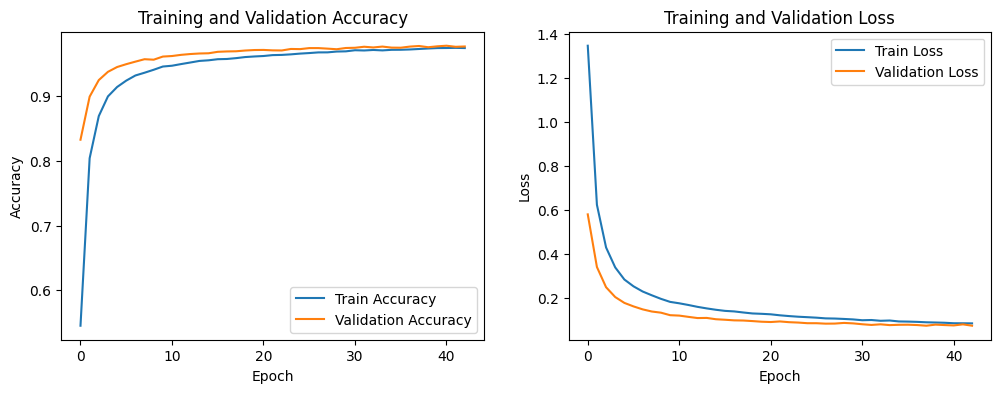

In [42]:
# Побудова графіків для точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Побудова графіків для втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Висновки:**

- Точність моделі: Після 40 епох тренування, модель досягла тестової точності 97.78%. Це дуже хороший результат для класифікації зображень з набору даних MNIST.

- Навчання та валідація: З плином епох, валідаційна точність поступово збільшувалася, а втрата зменшувалася, що свідчить про стабільне навчання без значного перенавчання.

- Підхід до навчання: Використання попередньо навченої моделі VGG16 для екстракції ознак, а потім навчання додаткових шарів для класифікації дозволило досягти високої точності на відносно невеликому наборі даних.


Точність отриманої згорткової мережі в порівнянні з точністю багатошарової мережі з попереднього завдання значно відрізняються. З попереднього відчуття попередньо навчені мережі більш продуктивні та легше навчаються з меншою ймовірністю перенавчання.

**Рекомендації**

- Додаткові епохи: Можна спробувати тренувати модель більше 40 епох, щоб побачити, чи можливо ще більше покращити результати.

- Зміна навчальної швидкості: Можна експериментувати з іншими значеннями швидкості навчання та схемами її зміни.

- Регуляризація: Якщо б з'явилися ознаки перенавчання, варто розглянути додаткові методи регуляризації, такі як L2-регуляризація чи збільшення коефіцієнта дропауту.

- Аугментація даних: Для подальшого покращення генералізації, можна спробувати додати аугментацію даних, що може збільшити розмір і різноманітність тренувального набору даних.